In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Creazione dei dizionari per ciascun modello con i dati forniti
models_data = {
    'GPT-4o': {
        'Accuracy': 0.8348172167596225, 
        'Precision': 0.8877970013943328, 
        'Recall': 0.9339764664237745, 
        'F1-Score': 0.897143625507121
    },
    'GPT-4o-mini': {
        'Accuracy': 0.8032928061345777,
        'Precision': 0.8471224237018296,
        'Recall': 0.9166947217351059,
        'F1-Score': 0.8661942533951766
    },
    'YOLOv8': {
        'Accuracy': 0.7707594936708856,
        'Precision': 0.8669620253164556, 
        'Recall': 0.8673417721518983, 
        'F1-Score': 0.8492405063291149
    },
    'LLaVA-1.6-mistral': {
        'Accuracy': 0.7038194171242124, 
        'Precision': 0.7355383628326669, 
        'Recall': 0.8970356354023004, 
        'F1-Score': 0.789617164504515
    },
    'Molmo-7B-D-0924': {
        'Accuracy': 0.7714628032321246, 
        'Precision': 0.7985452201086575, 
        'Recall': 0.9539714536792442, 
        'F1-Score': 0.8523625754453287
    },
    'Phi-3.5-vision-instruct': {
        'Accuracy': 0.6599168934421503, 
        'Precision': 0.7740150059205468, 
        'Recall': 0.7515108499023736, 
        'F1-Score': 0.740967500328537
    }
}

# Creazione di un DataFrame dai dati forniti
df = pd.DataFrame(models_data).T  # Trasponiamo il DataFrame per avere i modelli come righe

# Visualizzazione del DataFrame
df

,Accuracy,Precision,Recall,F1-Score
GPT-4o,0.834817,0.887797,0.933976,0.897144
GPT-4o-mini,0.803293,0.847122,0.916695,0.866194
YOLOv8,0.770759,0.866962,0.867342,0.849241
LLaVA-1.6-mistral,0.703819,0.735538,0.897036,0.789617
Molmo-7B-D-0924,0.771463,0.798545,0.953971,0.852363
Phi-3.5-vision-instruct,0.659917,0.774015,0.751511,0.740968


## 1. Accuracy (Accuratezza):
Cosa misura: L'accuracy indica quanto spesso il modello classifica correttamente, cioè quante volte il modello ha fatto una previsione giusta (sia per la classe positiva che per quella negativa). È una metrica generale per vedere la proporzione di risposte corrette rispetto a tutte le previsioni.
#### Quando è utile: È utile quando le classi sono bilanciate, cioè quando c'è lo stesso numero di esempi positivi e negativi nel dataset. Tuttavia, non è sempre ideale in contesti con classi sbilanciate.
## 2. Precision (Precisione):
Cosa misura: La precisione indica quanto spesso il modello prevede correttamente una classe positiva, considerando solo le previsioni positive. In altre parole, su tutte le volte che il modello ha previsto che un oggetto fosse presente (ad esempio, un casco di sicurezza o un guanto), quante di queste previsioni erano effettivamente corrette?
#### Quando è utile: La precisione è utile quando vuoi evitare falsi positivi, cioè situazioni in cui il modello prevede che qualcosa sia presente, ma non lo è. Ad esempio, in un sistema di sicurezza, potresti preferire una precisione alta per evitare falsi allarmi.
## 3. Recall (Sensibilità o Richiamo):
Cosa misura: Il recall indica quanto spesso il modello riesce a rilevare correttamente una classe positiva, cioè quanto è bravo il modello a trovare tutti gli oggetti corretti in un'immagine. Ad esempio, su tutti i caschi effettivamente presenti in una scena, quanti ne ha rilevati il modello?
#### Quando è utile: Il recall è cruciale quando il costo di perdere una classe positiva è alto. Per esempio, se è molto importante rilevare tutti i dispositivi di protezione individuale (PPE) per garantire la sicurezza, il recall dovrebbe essere elevato.
## 4. F1-Score:
Cosa misura: L'F1-score è una combinazione di precision e recall. È utile perché rappresenta un equilibrio tra entrambe le metriche, specialmente quando vuoi bilanciare i falsi positivi e i falsi negativi. Valuta come il modello gestisce correttamente la rilevazione e l'assenza di oggetti in un'immagine.
#### Quando è utile: L'F1-score è ideale quando hai bisogno di un compromesso tra precision e recall, cioè quando è importante sia identificare correttamente le classi positive che evitare errori inutili.
## Differenza tra Precision e Recall:
Precision è più importante quando vuoi essere sicuro che ogni previsione positiva sia corretta, anche se ciò significa che potresti non trovare tutte le occorrenze positive.
Recall è più importante quando vuoi catturare tutte le occorrenze positive, anche se ciò significa che potresti ottenere alcuni falsi positivi.

/tmp/ipykernel_30/753485627.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)


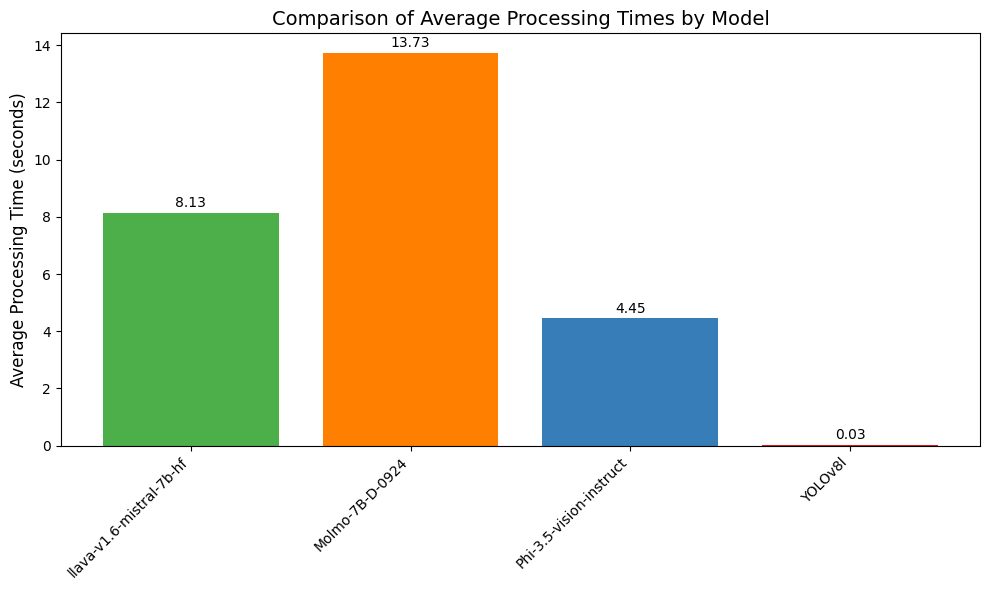

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Dati dei tempi medi di elaborazione
average_time = {
    'llava-v1.6-mistral-7b-hf': 8.129829746835442,
    'Molmo-7B-D-0924': 13.73072631899959,
    'Phi-3.5-vision-instruct': 4.445092405063294,
    'YOLOv8l': 0.030453,
}

# Estrarre i nomi dei modelli e i loro tempi medi
models = list(average_time.keys())
times = list(average_time.values())

# Creazione del grafico a barre
fig, ax = plt.subplots(figsize=(10, 6))

# Impostare i colori
colors = ['#4DAF4A', '#FF7F00', '#377EB8', '#E41A1C']

# Creare le barre per ogni modello
bars = ax.bar(models, times, color=colors)

# Aggiungere etichette e titolo
ax.set_ylabel('Average Processing Time (seconds)', fontsize=12)
ax.set_title('Comparison of Average Processing Times by Model', fontsize=14)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)

# Aggiungere i valori sulle barre
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

# Migliorare il layout
plt.tight_layout()

# Mostrare il grafico
plt.show()


In [10]:
'''PHI3

final metric People: {'final_accuracy': 0.7754451947489923, 'final_precision': 0.8199195846347747, 'final_recall': 0.8416015594813063, 'final_f1_score': 0.814095041699384}
final metric Hard_hats: {'final_accuracy': 0.6396790205300111, 'final_precision': 0.7345320291522823, 'final_recall': 0.6678052192258301, 'final_f1_score': 0.6809399001895565}
final metric Gloves: {'final_accuracy': 0.06395042194092827, 'final_precision': 0.09243143459915612, 'final_recall': 0.06962025316455697, 'final_f1_score': 0.07411410670904342}
final metric Reflective_vests: {'final_accuracy': 0.32149261603375534, 'final_precision': 0.35970464135021096, 'final_recall': 0.3446993670886076, 'final_f1_score': 0.342389309003233}
final metric Security_boots: {'final_accuracy': 0.011377335744424353, 'final_precision': 0.017932489451476793, 'final_recall': 0.012432188065099459, 'final_f1_score': 0.013924050632911394}

LLAVA
final metric: {'final_accuracy': 0.7038194171242124, 'final_precision': 0.7355383628326669, 'final_recall': 0.8970356354023004, 'final_f1_score': 0.789617164504515}final metric Hard_hats: {'final_accuracy': 0.8170939855946048, 'final_precision': 0.8374453737191079, 'final_recall': 0.8815473460527121, 'final_f1_score': 0.8479795846995233}
final metric Gloves: {'final_accuracy': 0.12037371910789631, 'final_precision': 0.14932941531042795, 'final_recall': 0.15775316455696203, 'final_f1_score': 0.14072307790662214}
final metric Reflective_vests: {'final_accuracy': 0.37417872212176007, 'final_precision': 0.38059448462929474, 'final_recall': 0.41763487040385777, 'final_f1_score': 0.3907410100448075}
final metric Security_boots: {'final_accuracy': 0.04955408515535097, 'final_precision': 0.0602697408077155, 'final_recall': 0.05574004055016714, 'final_f1_score': 0.05520211153122545}

MOLMO
final metric People: {'final_accuracy': 0.8727272727272727, 'final_precision': 0.8727272727272727, 'final_recall': 0.9636363636363636, 'final_f1_score': 0.9085571528887034}
final metric Hard_hats: {'final_accuracy': 0.7983116883116883, 'final_precision': 0.8292207792207792, 'final_recall': 0.86, 'final_f1_score': 0.8351062444138717}
final metric Gloves: {'final_accuracy': 0.1509090909090909, 'final_precision': 0.21666666666666665, 'final_recall': 0.1706060606060606, 'final_f1_score': 0.1757208448117539}
final metric Reflective_vests: {'final_accuracy': 0.35554112554112555, 'final_precision': 0.3591774891774892, 'final_recall': 0.43272727272727274, 'final_f1_score': 0.38140627049717957}
final metric Security_boots: {'final_accuracy': 0.08849862258953167, 'final_precision': 0.11136363636363636, 'final_recall': 0.10440771349862259, 'final_f1_score': 0.10177095631641085}

gpt4o
final metric People: {'final_accuracy': 0.9135960075437926, 'final_precision': 0.9370922150985443, 'final_recall': 0.9670101215591723, 'final_f1_score': 0.9415358220425202}
final metric Hard_hats: {'final_accuracy': 0.8458324498225432, 'final_precision': 0.8760295084662173, 'final_recall': 0.8811953464196172, 'final_f1_score': 0.8710365333383813}
final metric Gloves: {'final_accuracy': 0.1248945147679325, 'final_precision': 0.177373417721519, 'final_recall': 0.13422995780590719, 'final_f1_score': 0.14479720349973507}
final metric Reflective_vests: {'final_accuracy': 0.3928941311852704, 'final_precision': 0.3983341552961806, 'final_recall': 0.4122814948764316, 'final_f1_score': 0.4014231910639207}
final metric Security_boots: {'final_accuracy': 0.032775426050742504, 'final_precision': 0.050237341772151896, 'final_recall': 0.0395001095950463, 'final_f1_score': 0.04011488733340832}

gpt4omini
final metric People: {'final_accuracy': 0.8888412484140337, 'final_precision': 0.9084613083821947, 'final_recall': 0.9455698134495604, 'final_f1_score': 0.9160310608506423}
final metric Hard_hats: {'final_accuracy': 0.8067635034200803, 'final_precision': 0.8287334237492466, 'final_recall': 0.8641060290379222, 'final_f1_score': 0.8357906732533263}
final metric Gloves: {'final_accuracy': 0.11334388185654007, 'final_precision': 0.14477848101265822, 'final_recall': 0.12362869198312235, 'final_f1_score': 0.12758552980071966}
final metric Reflective_vests: {'final_accuracy': 0.3914494173196704, 'final_precision': 0.39998618645770545, 'final_recall': 0.41234930681133203, 'final_f1_score': 0.40191314228916597}
final metric Security_boots: {'final_accuracy': 0.03385664967943449, 'final_precision': 0.04641350210970464, 'final_recall': 0.03807605896213491, 'final_f1_score': 0.03989957873202377}


yolov8
final metric people: {'final_accuracy': 0.8379113924050632, 'final_precision': 0.8895569620253163, 'final_recall': 0.9230379746835441, 'final_f1_score': 0.8871835443037981}
final metric Hard_hats: {'final_accuracy': 0.0, 'final_precision': 0.0, 'final_recall': 0.0, 'final_f1_score': 0.0}
final metric Gloves: {'final_accuracy': 0.11550632911392407, 'final_precision': 0.14556962025316456, 'final_recall': 0.13132911392405067, 'final_f1_score': 0.12974683544303803}
final metric Reflective_vests: {'final_accuracy': 0.37344936708860754, 'final_precision': 0.3868670886075949, 'final_recall': 0.39797468354430376, 'final_f1_score': 0.38762658227848096}
final metric Security_boots: {'final_accuracy': 0.026012658227848102, 'final_precision': 0.049367088607594936, 'final_recall': 0.027278481012658232, 'final_f1_score': 0.0335759493670886}

'''

"PHI3\n\nfinal metric People: {'final_accuracy': 0.7754451947489923, 'final_precision': 0.8199195846347747, 'final_recall': 0.8416015594813063, 'final_f1_score': 0.814095041699384}\nfinal metric Hard_hats: {'final_accuracy': 0.6396790205300111, 'final_precision': 0.7345320291522823, 'final_recall': 0.6678052192258301, 'final_f1_score': 0.6809399001895565}\nfinal metric Gloves: {'final_accuracy': 0.06395042194092827, 'final_precision': 0.09243143459915612, 'final_recall': 0.06962025316455697, 'final_f1_score': 0.07411410670904342}\nfinal metric Reflective_vests: {'final_accuracy': 0.32149261603375534, 'final_precision': 0.35970464135021096, 'final_recall': 0.3446993670886076, 'final_f1_score': 0.342389309003233}\nfinal metric Security_boots: {'final_accuracy': 0.011377335744424353, 'final_precision': 0.017932489451476793, 'final_recall': 0.012432188065099459, 'final_f1_score': 0.013924050632911394}\n\nLLAVA\nfinal metric: {'final_accuracy': 0.7038194171242124, 'final_precision': 0.73553

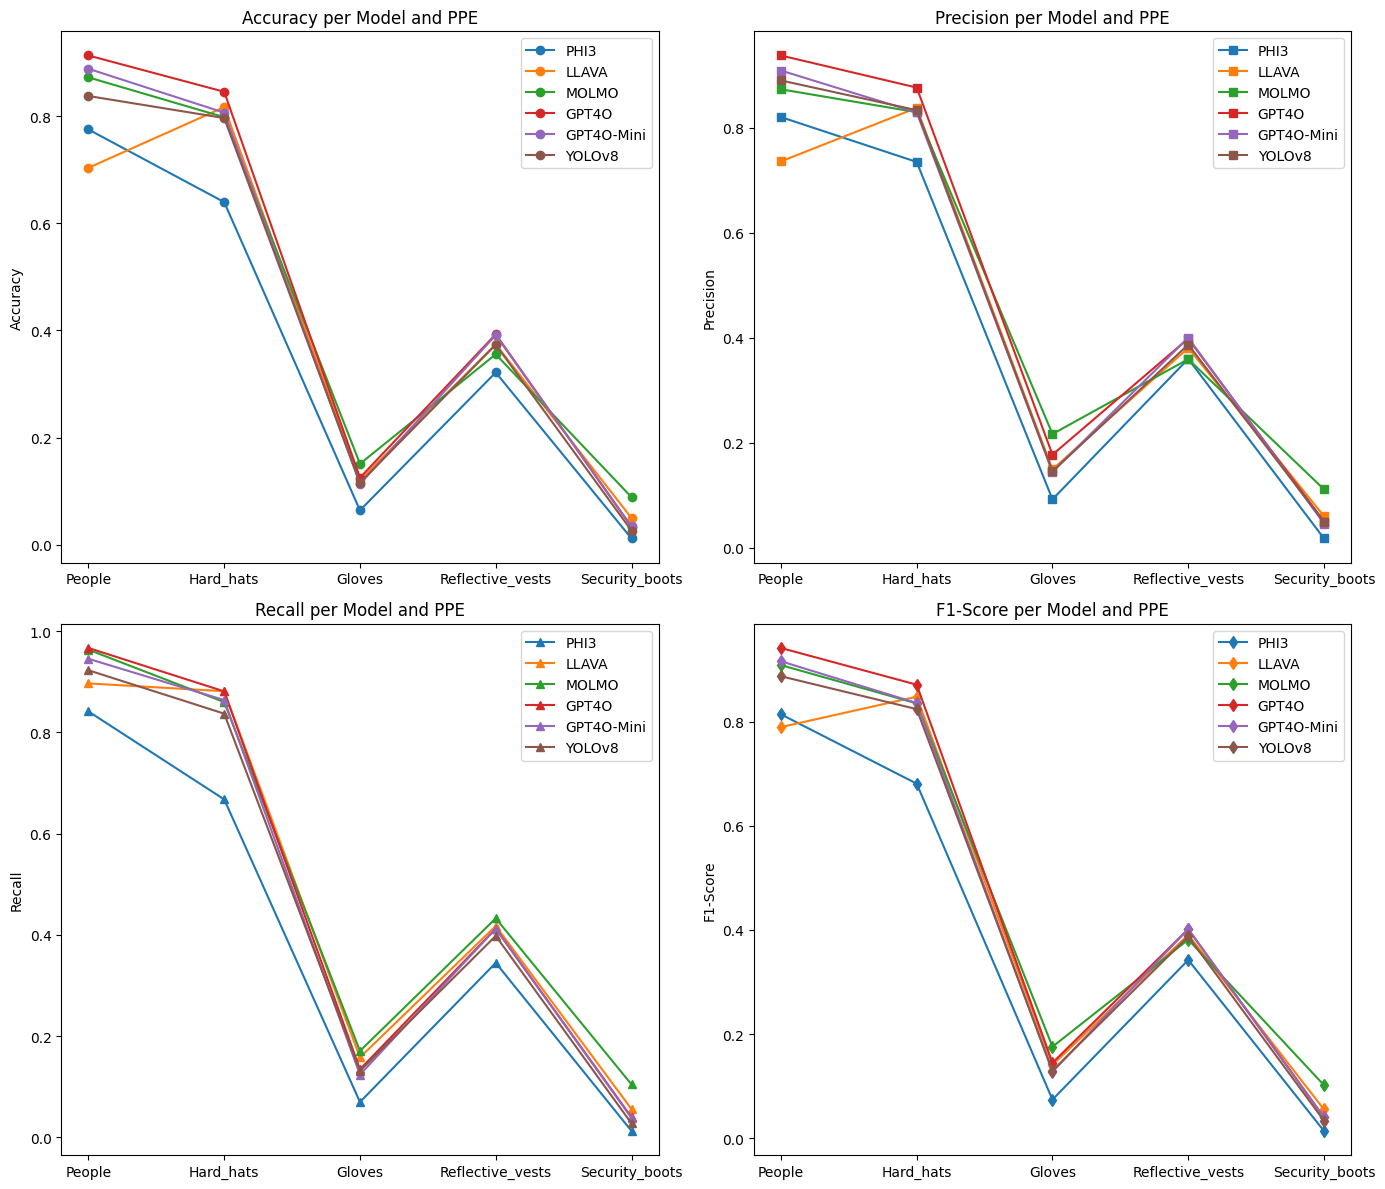

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Dati delle metriche per i modelli e i diversi tipi di DPI
models = ['PHI3', 'LLAVA', 'MOLMO', 'GPT4O', 'GPT4O-Mini', 'YOLOv8']
categories = ['People', 'Hard_hats', 'Gloves', 'Reflective_vests', 'Security_boots']

accuracy = [
    [0.7754, 0.6397, 0.06395, 0.3215, 0.0114],  # PHI3
    [0.7038, 0.8171, 0.1204, 0.3742, 0.0496],  # LLAVA
    [0.8727, 0.7983, 0.1509, 0.3555, 0.0885],  # MOLMO
    [0.9136, 0.8458, 0.1249, 0.3929, 0.0328],  # GPT4O
    [0.8888, 0.8068, 0.1133, 0.3914, 0.0339],  # GPT4O-Mini
    [0.8379, 0.7967, 0.1155, 0.3734, 0.0260]   # YOLOv8
]

precision = [
    [0.8199, 0.7345, 0.0924, 0.3597, 0.0179],  # PHI3
    [0.7355, 0.8374, 0.1493, 0.3806, 0.0603],  # LLAVA
    [0.8727, 0.8292, 0.2167, 0.3592, 0.1114],  # MOLMO
    [0.9371, 0.8760, 0.1774, 0.3983, 0.0502],  # GPT4O
    [0.9085, 0.8287, 0.1448, 0.4000, 0.0464],  # GPT4O-Mini
    [0.8896, 0.8330, 0.1456, 0.3869, 0.0494]   # YOLOv8
]

recall = [
    [0.8416, 0.6678, 0.0696, 0.3447, 0.0124],  # PHI3
    [0.8970, 0.8815, 0.1578, 0.4176, 0.0557],  # LLAVA
    [0.9636, 0.86, 0.1706, 0.4327, 0.1044],    # MOLMO
    [0.9670, 0.8812, 0.1342, 0.4123, 0.0395],  # GPT4O
    [0.9456, 0.8641, 0.1236, 0.4123, 0.0381],  # GPT4O-Mini
    [0.9230, 0.8372, 0.1313, 0.3980, 0.0273]   # YOLOv8
]

f1_score = [
    [0.8141, 0.6809, 0.0741, 0.3424, 0.0139],  # PHI3
    [0.7896, 0.8480, 0.1407, 0.3907, 0.0552],  # LLAVA
    [0.9086, 0.8351, 0.1757, 0.3814, 0.1018],  # MOLMO
    [0.9415, 0.8710, 0.1448, 0.4014, 0.0401],  # GPT4O
    [0.9160, 0.8358, 0.1276, 0.4019, 0.0399],  # GPT4O-Mini
    [0.8872, 0.8241, 0.1297, 0.3876, 0.0336]   # YOLOv8
]

x = np.arange(len(categories))

# Imposta i grafici con 4 subplots (uno per ogni metrica)
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Accuracy
for i, model in enumerate(models):
    ax[0, 0].plot(x, accuracy[i], label=model, marker='o')

ax[0, 0].set_title('Accuracy per Model and PPE')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(categories)
ax[0, 0].set_ylabel('Accuracy')
ax[0, 0].legend()

# Precision
for i, model in enumerate(models):
    ax[0, 1].plot(x, precision[i], label=model, marker='s')

ax[0, 1].set_title('Precision per Model and PPE')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(categories)
ax[0, 1].set_ylabel('Precision')
ax[0, 1].legend()

# Recall
for i, model in enumerate(models):
    ax[1, 0].plot(x, recall[i], label=model, marker='^')

ax[1, 0].set_title('Recall per Model and PPE')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(categories)
ax[1, 0].set_ylabel('Recall')
ax[1, 0].legend()

# F1-Score
for i, model in enumerate(models):
    ax[1, 1].plot(x, f1_score[i], label=model, marker='d')

ax[1, 1].set_title('F1-Score per Model and PPE')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(categories)
ax[1, 1].set_ylabel('F1-Score')
ax[1, 1].legend()

plt.tight_layout()
plt.show()


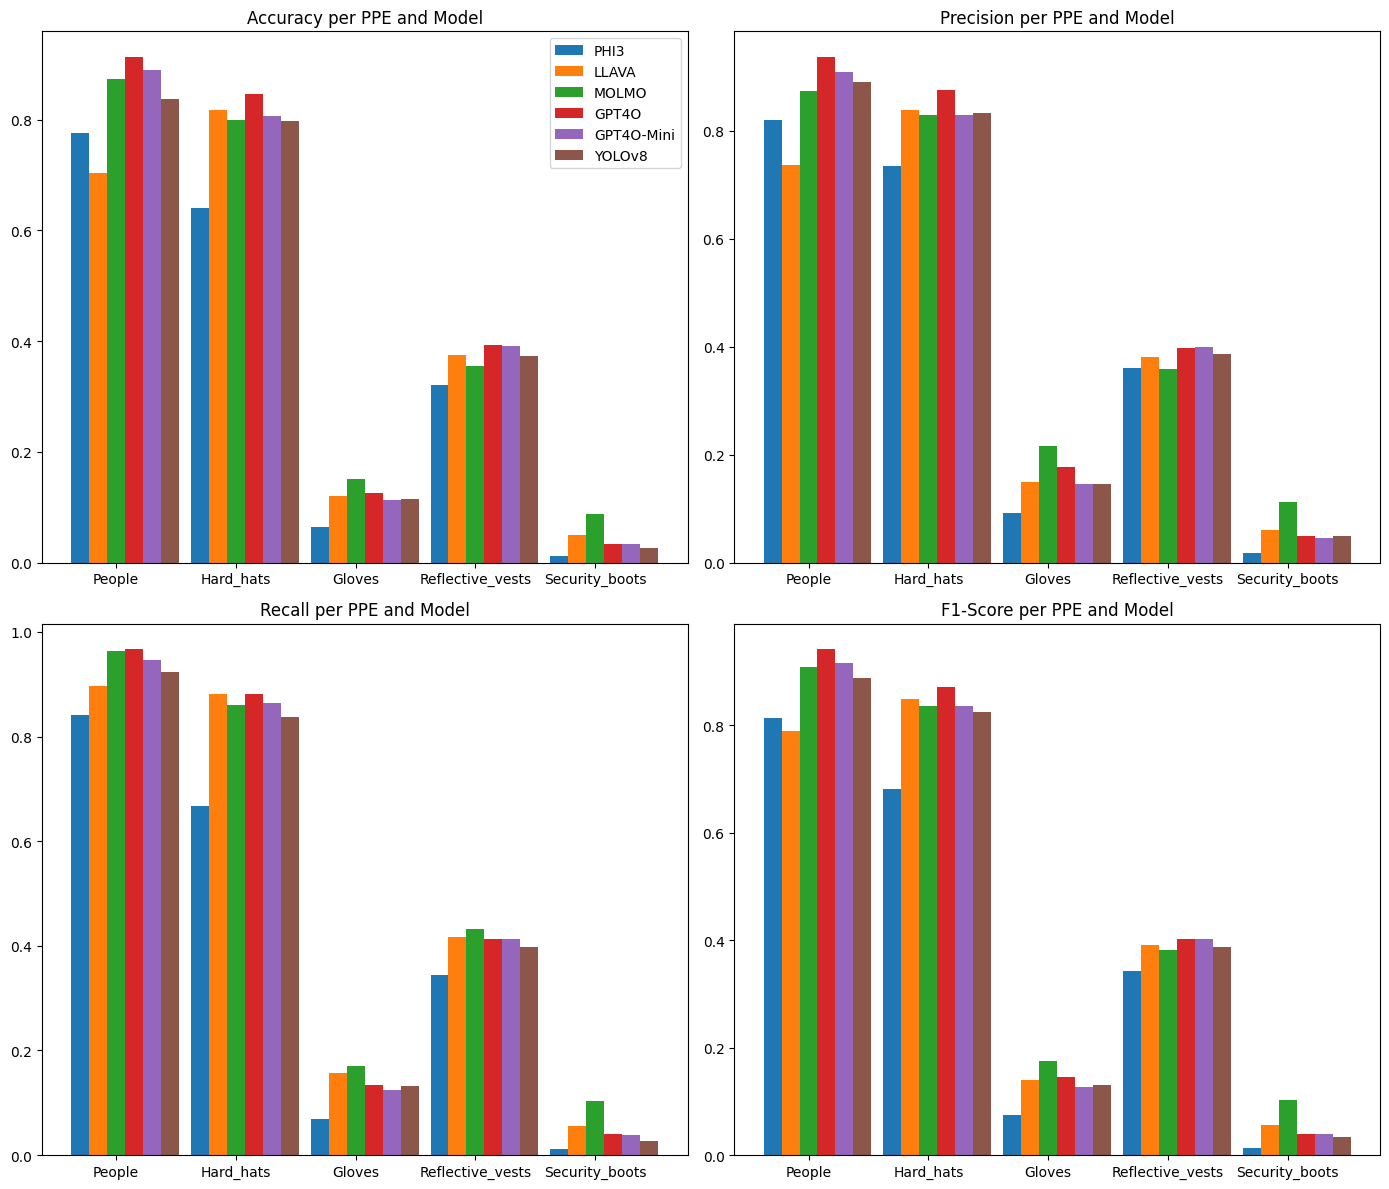

In [12]:
# Creiamo un grafico a barre per le metriche, una barra per ogni modello e DPI

x = np.arange(len(categories))  # Posizioni delle categorie (PPE)
width = 0.15  # Larghezza delle barre

fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Plot Accuracy
ax[0, 0].bar(x - 2 * width, accuracy[0], width, label='PHI3')
ax[0, 0].bar(x - width, accuracy[1], width, label='LLAVA')
ax[0, 0].bar(x, accuracy[2], width, label='MOLMO')
ax[0, 0].bar(x + width, accuracy[3], width, label='GPT4O')
ax[0, 0].bar(x + 2 * width, accuracy[4], width, label='GPT4O-Mini')
ax[0, 0].bar(x + 3 * width, accuracy[5], width, label='YOLOv8')

ax[0, 0].set_title('Accuracy per PPE and Model')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(categories)
ax[0, 0].legend()

# Plot Precision
ax[0, 1].bar(x - 2 * width, precision[0], width, label='PHI3')
ax[0, 1].bar(x - width, precision[1], width, label='LLAVA')
ax[0, 1].bar(x, precision[2], width, label='MOLMO')
ax[0, 1].bar(x + width, precision[3], width, label='GPT4O')
ax[0, 1].bar(x + 2 * width, precision[4], width, label='GPT4O-Mini')
ax[0, 1].bar(x + 3 * width, precision[5], width, label='YOLOv8')

ax[0, 1].set_title('Precision per PPE and Model')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(categories)

# Plot Recall
ax[1, 0].bar(x - 2 * width, recall[0], width, label='PHI3')
ax[1, 0].bar(x - width, recall[1], width, label='LLAVA')
ax[1, 0].bar(x, recall[2], width, label='MOLMO')
ax[1, 0].bar(x + width, recall[3], width, label='GPT4O')
ax[1, 0].bar(x + 2 * width, recall[4], width, label='GPT4O-Mini')
ax[1, 0].bar(x + 3 * width, recall[5], width, label='YOLOv8')

ax[1, 0].set_title('Recall per PPE and Model')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(categories)

# Plot F1-Score
ax[1, 1].bar(x - 2 * width, f1_score[0], width, label='PHI3')
ax[1, 1].bar(x - width, f1_score[1], width, label='LLAVA')
ax[1, 1].bar(x, f1_score[2], width, label='MOLMO')
ax[1, 1].bar(x + width, f1_score[3], width, label='GPT4O')
ax[1, 1].bar(x + 2 * width, f1_score[4], width, label='GPT4O-Mini')
ax[1, 1].bar(x + 3 * width, f1_score[5], width, label='YOLOv8')

ax[1, 1].set_title('F1-Score per PPE and Model')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(categories)

plt.tight_layout()
plt.show()


/tmp/ipykernel_30/2216275949.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(sorted_models_accuracy, rotation=45, ha='right')
/tmp/ipykernel_30/2216275949.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(sorted_models_precision, rotation=45, ha='right')
/tmp/ipykernel_30/2216275949.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(sorted_models_recall, rotation=45, ha='right')
/tmp/ipykernel_30/2216275949.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(sorted_models_f1_score, rotation=45, ha='right')


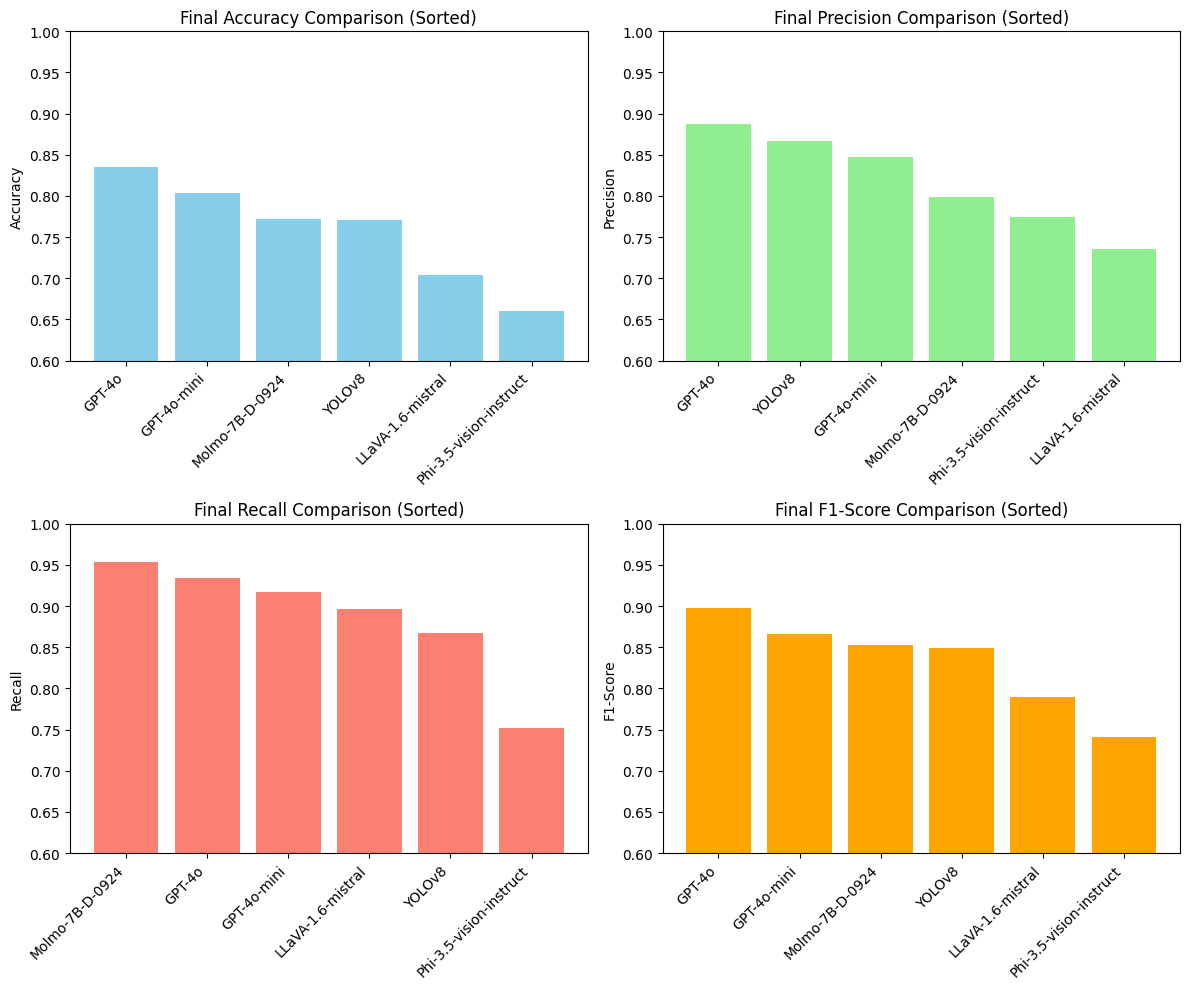

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Dati e modelli come forniti
models = ['GPT-4o', 'GPT-4o-mini', 'YOLOv8', 'LLaVA-1.6-mistral', 'Molmo-7B-D-0924', 'Phi-3.5-vision-instruct']

accuracy = [
    0.8348172167596225,  # GPT-4o
    0.8032928061345777,  # GPT-4o-mini
    0.7707594936708856,  # YOLOv8
    0.7038194171242124,  # LLaVA-1.6-mistral
    0.7714628032321246,  # Molmo-7B-D-0924
    0.6599168934421503   # Phi-3.5-vision-instruct
]

precision = [
    0.8877970013943328,  # GPT-4o
    0.8471224237018296,  # GPT-4o-mini
    0.8669620253164556,  # YOLOv8
    0.7355383628326669,  # LLaVA-1.6-mistral
    0.7985452201086575,  # Molmo-7B-D-0924
    0.7740150059205468   # Phi-3.5-vision-instruct
]

recall = [
    0.9339764664237745,  # GPT-4o
    0.9166947217351059,  # GPT-4o-mini
    0.8673417721518983,  # YOLOv8
    0.8970356354023004,  # LLaVA-1.6-mistral
    0.9539714536792442,  # Molmo-7B-D-0924
    0.7515108499023736   # Phi-3.5-vision-instruct
]

f1_score = [
    0.897143625507121,   # GPT-4o
    0.8661942533951766,  # GPT-4o-mini
    0.8492405063291149,  # YOLOv8
    0.789617164504515,   # LLaVA-1.6-mistral
    0.8523625754453287,  # Molmo-7B-D-0924
    0.740967500328537    # Phi-3.5-vision-instruct
]

# Ordinare i dati in base alle metriche (decrescente)
sorted_indices_accuracy = np.argsort(accuracy)[::-1]
sorted_indices_precision = np.argsort(precision)[::-1]
sorted_indices_recall = np.argsort(recall)[::-1]
sorted_indices_f1_score = np.argsort(f1_score)[::-1]

# Riorganizzare i dati ordinati
sorted_models_accuracy = [models[i] for i in sorted_indices_accuracy]
sorted_accuracy = [accuracy[i] for i in sorted_indices_accuracy]

sorted_models_precision = [models[i] for i in sorted_indices_precision]
sorted_precision = [precision[i] for i in sorted_indices_precision]

sorted_models_recall = [models[i] for i in sorted_indices_recall]
sorted_recall = [recall[i] for i in sorted_indices_recall]

sorted_models_f1_score = [models[i] for i in sorted_indices_f1_score]
sorted_f1_score = [f1_score[i] for i in sorted_indices_f1_score]

# Creazione dei grafici ordinati con la stessa scala
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Definiamo un limite comune per l'asse Y basato sui valori massimi nelle metriche
common_ylim = (0.6, 1.0)  # Impostiamo da 0.6 a 1.0 per tutte le metriche

# Grafico per Accuracy ordinato
axes[0, 0].bar(sorted_models_accuracy, sorted_accuracy, color='skyblue')
axes[0, 0].set_title('Final Accuracy Comparison (Sorted)')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_xticklabels(sorted_models_accuracy, rotation=45, ha='right')
axes[0, 0].set_ylim(common_ylim)

# Grafico per Precision ordinato
axes[0, 1].bar(sorted_models_precision, sorted_precision, color='lightgreen')
axes[0, 1].set_title('Final Precision Comparison (Sorted)')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_xticklabels(sorted_models_precision, rotation=45, ha='right')
axes[0, 1].set_ylim(common_ylim)

# Grafico per Recall ordinato
axes[1, 0].bar(sorted_models_recall, sorted_recall, color='salmon')
axes[1, 0].set_title('Final Recall Comparison (Sorted)')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_xticklabels(sorted_models_recall, rotation=45, ha='right')
axes[1, 0].set_ylim(common_ylim)

# Grafico per F1-Score ordinato
axes[1, 1].bar(sorted_models_f1_score, sorted_f1_score, color='orange')
axes[1, 1].set_title('Final F1-Score Comparison (Sorted)')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].set_xticklabels(sorted_models_f1_score, rotation=45, ha='right')
axes[1, 1].set_ylim(common_ylim)

# Adattamento della visualizzazione
plt.tight_layout()

# Mostra i grafici
plt.show()


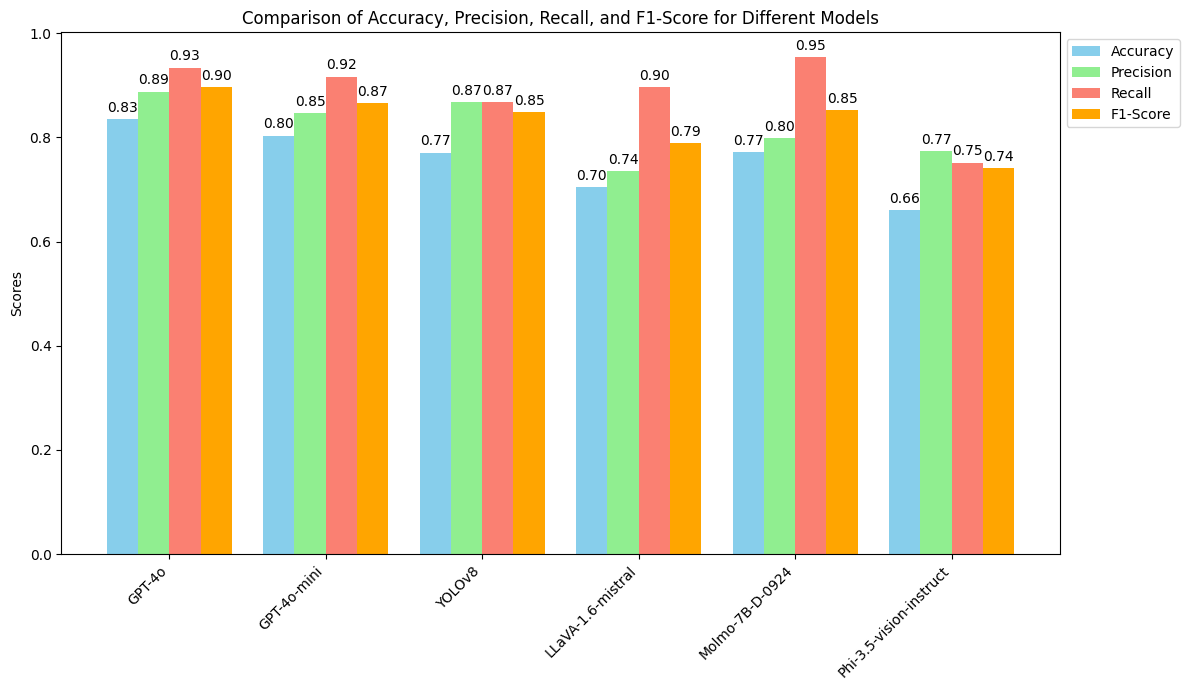

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definire i modelli e le metriche
models = ['GPT-4o', 'GPT-4o-mini', 'YOLOv8', 'LLaVA-1.6-mistral', 'Molmo-7B-D-0924', 'Phi-3.5-vision-instruct']

accuracy = [
    0.8348172167596225,  # GPT-4o
    0.8032928061345777,  # GPT-4o-mini
    0.7707594936708856,  # YOLOv8
    0.7038194171242124,  # LLaVA-1.6-mistral
    0.7714628032321246,  # Molmo-7B-D-0924
    0.6599168934421503   # Phi-3.5-vision-instruct
]

precision = [
    0.8877970013943328,  # GPT-4o
    0.8471224237018296,  # GPT-4o-mini
    0.8669620253164556,  # YOLOv8
    0.7355383628326669,  # LLaVA-1.6-mistral
    0.7985452201086575,  # Molmo-7B-D-0924
    0.7740150059205468   # Phi-3.5-vision-instruct
]

recall = [
    0.9339764664237745,  # GPT-4o
    0.9166947217351059,  # GPT-4o-mini
    0.8673417721518983,  # YOLOv8
    0.8970356354023004,  # LLaVA-1.6-mistral
    0.9539714536792442,  # Molmo-7B-D-0924
    0.7515108499023736   # Phi-3.5-vision-instruct
]

f1_score = [
    0.897143625507121,   # GPT-4o
    0.8661942533951766,  # GPT-4o-mini
    0.8492405063291149,  # YOLOv8
    0.789617164504515,   # LLaVA-1.6-mistral
    0.8523625754453287,  # Molmo-7B-D-0924
    0.740967500328537    # Phi-3.5-vision-instruct
]
# Definire x come la posizione per le barre
x = np.arange(len(models))
width = 0.2  # Larghezza delle barre

# Creazione di un grafico con le metriche
fig, ax = plt.subplots(figsize=(12, 7))

# Creazione di barre per ogni metrica
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision', color='lightgreen')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall', color='salmon')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1-Score', color='orange')

# Aggiunta di etichette e titolo
ax.set_ylabel('Scores')
ax.set_title('Comparison of Accuracy, Precision, Recall, and F1-Score for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Spostiamo la legenda fuori dal grafico
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Funzione per aggiungere i valori sopra le barre
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Aggiunta dei valori sopra le barre
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

plt.tight_layout()
plt.show()

Grafico a ragno

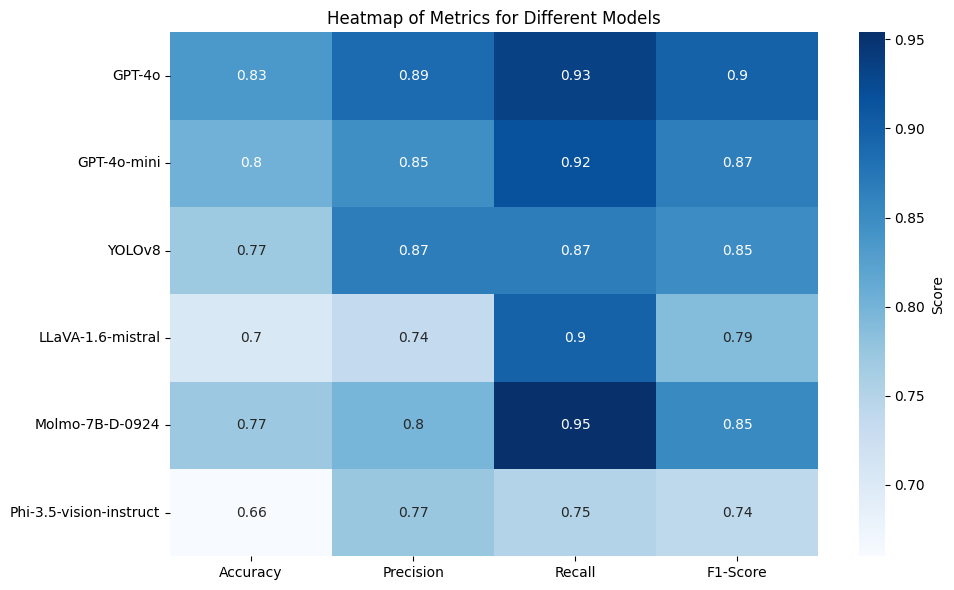

In [15]:
models = ['GPT-4o', 'GPT-4o-mini', 'YOLOv8', 'LLaVA-1.6-mistral', 'Molmo-7B-D-0924', 'Phi-3.5-vision-instruct']

accuracy = [
    0.8348172167596225,  # GPT-4o
    0.8032928061345777,  # GPT-4o-mini
    0.7707594936708856,  # YOLOv8
    0.7038194171242124,  # LLaVA-1.6-mistral
    0.7714628032321246,  # Molmo-7B-D-0924
    0.6599168934421503   # Phi-3.5-vision-instruct
]

precision = [
    0.8877970013943328,  # GPT-4o
    0.8471224237018296,  # GPT-4o-mini
    0.8669620253164556,  # YOLOv8
    0.7355383628326669,  # LLaVA-1.6-mistral
    0.7985452201086575,  # Molmo-7B-D-0924
    0.7740150059205468   # Phi-3.5-vision-instruct
]

recall = [
    0.9339764664237745,  # GPT-4o
    0.9166947217351059,  # GPT-4o-mini
    0.8673417721518983,  # YOLOv8
    0.8970356354023004,  # LLaVA-1.6-mistral
    0.9539714536792442,  # Molmo-7B-D-0924
    0.7515108499023736   # Phi-3.5-vision-instruct
]

f1_score = [
    0.897143625507121,   # GPT-4o
    0.8661942533951766,  # GPT-4o-mini
    0.8492405063291149,  # YOLOv8
    0.789617164504515,   # LLaVA-1.6-mistral
    0.8523625754453287,  # Molmo-7B-D-0924
    0.740967500328537    # Phi-3.5-vision-instruct
]
import seaborn as sns
import numpy as np

# Creiamo una matrice di dati con le metriche per i vari modelli
heatmap_data = np.array([accuracy, precision, recall, f1_score])

# Invertiamo la matrice per allinearla ai modelli
heatmap_data = heatmap_data.T

# Creiamo una heatmap
fig, ax = plt.subplots(figsize=(10, 6))

# Utilizziamo seaborn per creare la heatmap
sns.heatmap(heatmap_data, annot=True, cmap="Blues", xticklabels=['Accuracy', 'Precision', 'Recall', 'F1-Score'], yticklabels=models, cbar_kws={'label': 'Score'})

# Aggiungiamo il titolo
ax.set_title('Heatmap of Metrics for Different Models')

# Mostra il grafico
plt.tight_layout()
plt.show()

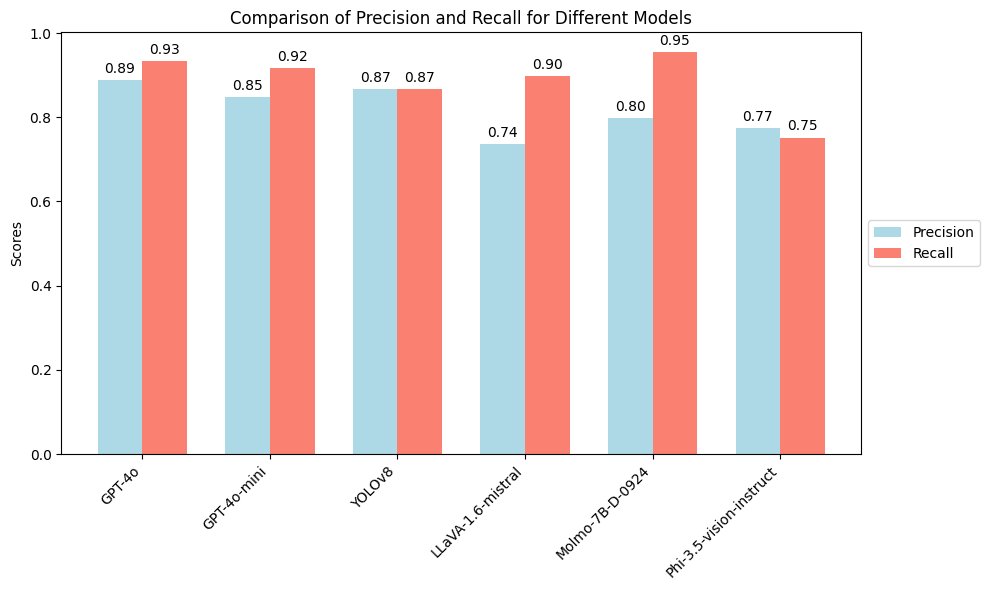

In [16]:
models = ['GPT-4o', 'GPT-4o-mini', 'YOLOv8', 'LLaVA-1.6-mistral', 'Molmo-7B-D-0924', 'Phi-3.5-vision-instruct']

accuracy = [
    0.8348172167596225,  # GPT-4o
    0.8032928061345777,  # GPT-4o-mini
    0.7707594936708856,  # YOLOv8
    0.7038194171242124,  # LLaVA-1.6-mistral
    0.7714628032321246,  # Molmo-7B-D-0924
    0.6599168934421503   # Phi-3.5-vision-instruct
]

precision = [
    0.8877970013943328,  # GPT-4o
    0.8471224237018296,  # GPT-4o-mini
    0.8669620253164556,  # YOLOv8
    0.7355383628326669,  # LLaVA-1.6-mistral
    0.7985452201086575,  # Molmo-7B-D-0924
    0.7740150059205468   # Phi-3.5-vision-instruct
]

recall = [
    0.9339764664237745,  # GPT-4o
    0.9166947217351059,  # GPT-4o-mini
    0.8673417721518983,  # YOLOv8
    0.8970356354023004,  # LLaVA-1.6-mistral
    0.9539714536792442,  # Molmo-7B-D-0924
    0.7515108499023736   # Phi-3.5-vision-instruct
]

f1_score = [
    0.897143625507121,   # GPT-4o
    0.8661942533951766,  # GPT-4o-mini
    0.8492405063291149,  # YOLOv8
    0.789617164504515,   # LLaVA-1.6-mistral
    0.8523625754453287,  # Molmo-7B-D-0924
    0.740967500328537    # Phi-3.5-vision-instruct
]
# Valori di precision e recall
precision_values = precision
recall_values = recall

# Impostare la larghezza delle barre e la posizione delle etichette
width = 0.35  # Larghezza delle barre

# Creiamo nuovamente il grafico a barre raggruppate
fig, ax = plt.subplots(figsize=(10, 6))

# Aggiungere le barre per Precision e Recall
rects1 = ax.bar(x - width/2, precision_values, width, label='Precision', color='lightblue')
rects2 = ax.bar(x + width/2, recall_values, width, label='Recall', color='salmon')

# Aggiungere etichette e titolo
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision and Recall for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Spostare la legenda a destra
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Aggiungere i valori sulle barre
add_labels(rects1)
add_labels(rects2)

# Mostrare il grafico
plt.tight_layout()
plt.show()


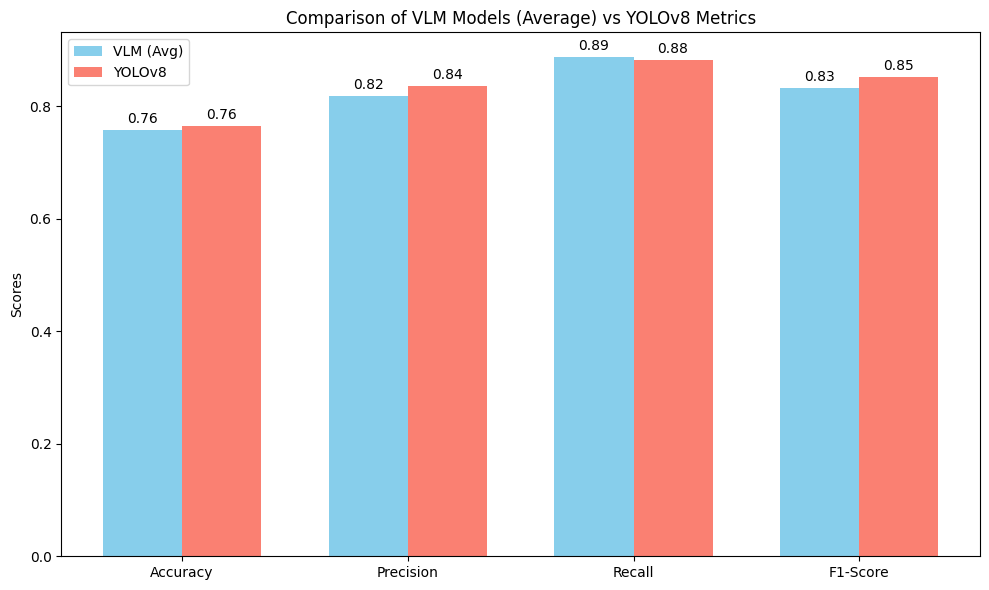

In [22]:
import numpy as np
import matplotlib.pyplot as plt

vlm_metrics = {
    'accuracy' : [
        0.8348172167596225,  # GPT-4o
        0.8032928061345777,  # GPT-4o-mini
        0.7707594936708856,  # YOLOv8
        0.7038194171242124,  # LLaVA-1.6-mistral
        0.7714628032321246,  # Molmo-7B-D-0924
        0.6599168934421503   # Phi-3.5-vision-instruct
    ],
    
    'precision' : [
        0.8877970013943328,  # GPT-4o
        0.8471224237018296,  # GPT-4o-mini
        0.8669620253164556,  # YOLOv8
        0.7355383628326669,  # LLaVA-1.6-mistral
        0.7985452201086575,  # Molmo-7B-D-0924
        0.7740150059205468   # Phi-3.5-vision-instruct
    ],
    
    'recall' : [
        0.9339764664237745,  # GPT-4o
        0.9166947217351059,  # GPT-4o-mini
        0.8673417721518983,  # YOLOv8
        0.8970356354023004,  # LLaVA-1.6-mistral
        0.9539714536792442,  # Molmo-7B-D-0924
        0.7515108499023736   # Phi-3.5-vision-instruct
    ],
    
    'f1_score' : [
        0.897143625507121,   # GPT-4o
        0.8661942533951766,  # GPT-4o-mini
        0.8492405063291149,  # YOLOv8
        0.789617164504515,   # LLaVA-1.6-mistral
        0.8523625754453287,  # Molmo-7B-D-0924
        0.740967500328537    # Phi-3.5-vision-instruct
    ]
}

# Dati delle metriche per YOLOv8
yolo_metrics = {
    'Accuracy': 0.764113924050633,
    'Precision': 0.8358227848101263,
    'Recall': 0.8820886075949363,
    'F1-Score': 0.8518354430379745
}

# Calcolare le medie delle metriche dei modelli VLM
vlm_mean_metrics = {key: np.mean(values) for key, values in vlm_metrics.items()}

# Impostare i nomi delle metriche
metrics_labels = ['accuracy', 'precision', 'recall', 'f1_score']

# Dati per il grafico (medie VLM vs YOLOv8)
vlm_values = [vlm_mean_metrics[metric] for metric in metrics_labels]

# Mappare i nomi in modo che corrispondano a yolo_metrics
metrics_map = {
    'accuracy': 'Accuracy',
    'precision': 'Precision',
    'recall': 'Recall',
    'f1_score': 'F1-Score'
}

yolo_values = [yolo_metrics[metrics_map[metric]] for metric in metrics_labels]

# Creare un grafico comparativo
x = np.arange(len(metrics_labels))  # La posizione per le metriche
width = 0.35  # Larghezza delle barre

fig, ax = plt.subplots(figsize=(10, 6))

# Aggiungere le barre per le medie dei modelli VLM e YOLOv8
bars1 = ax.bar(x - width/2, vlm_values, width, label='VLM (Avg)', color='skyblue')
bars2 = ax.bar(x + width/2, yolo_values, width, label='YOLOv8', color='salmon')

# Aggiungere etichette e titolo
ax.set_ylabel('Scores')
ax.set_title('Comparison of VLM Models (Average) vs YOLOv8 Metrics')
ax.set_xticks(x)
ax.set_xticklabels([metrics_map[label].replace('_', '-') for label in metrics_labels])

# Aggiungere la legenda
ax.legend()

# Aggiungere i valori sulle barre
def add_value_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width()/2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

# Migliorare l'aspetto del grafico
plt.tight_layout()
plt.show()


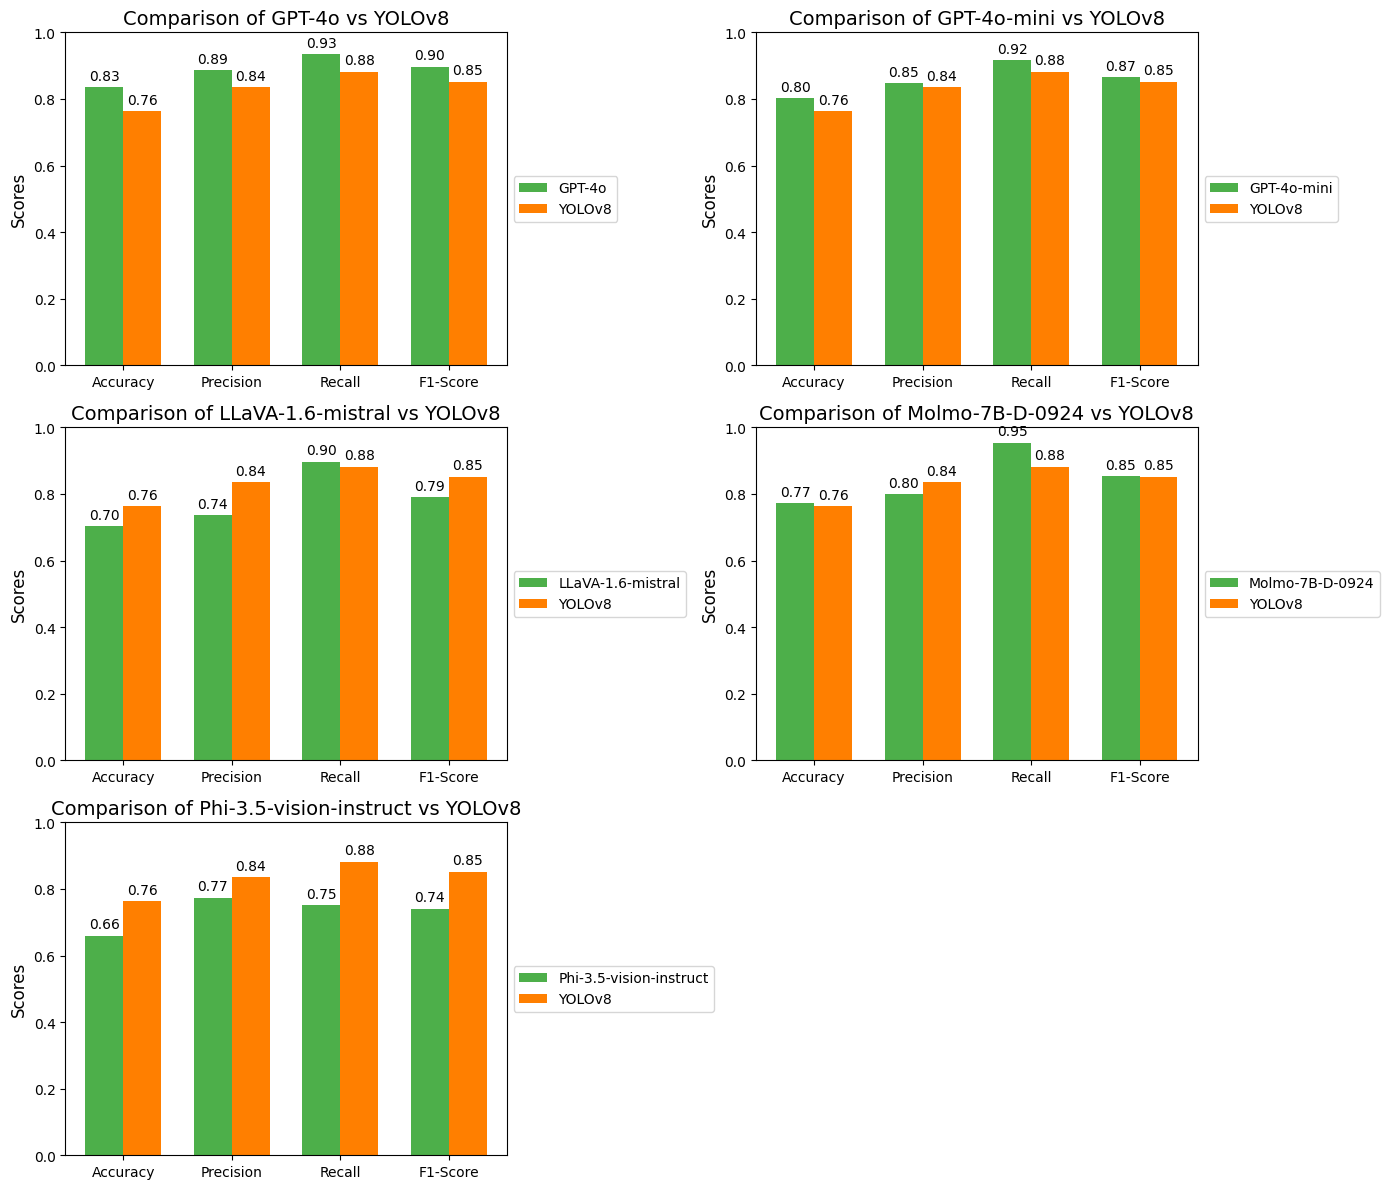

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Dati delle metriche finali per i modelli VLM (GPT-4o, GPT-4o-mini, LLaVA, Molmo, Phi)
models_data = {
    'GPT-4o': {
        'Accuracy': 0.8348172167596225, 
        'Precision': 0.8877970013943328, 
        'Recall': 0.9339764664237745, 
        'F1-Score': 0.897143625507121
    },
    'GPT-4o-mini': {
        'Accuracy': 0.8032928061345777,
        'Precision': 0.8471224237018296,
        'Recall': 0.9166947217351059,
        'F1-Score': 0.8661942533951766
    },
    'YOLOv8': {
        'Accuracy': 0.7707594936708856,
        'Precision': 0.8669620253164556, 
        'Recall': 0.8673417721518983, 
        'F1-Score': 0.8492405063291149
    },
    'LLaVA-1.6-mistral': {
        'Accuracy': 0.7038194171242124, 
        'Precision': 0.7355383628326669, 
        'Recall': 0.8970356354023004, 
        'F1-Score': 0.789617164504515
    },
    'Molmo-7B-D-0924': {
        'Accuracy': 0.7714628032321246, 
        'Precision': 0.7985452201086575, 
        'Recall': 0.9539714536792442, 
        'F1-Score': 0.8523625754453287
    },
    'Phi-3.5-vision-instruct': {
        'Accuracy': 0.6599168934421503, 
        'Precision': 0.7740150059205468, 
        'Recall': 0.7515108499023736, 
        'F1-Score': 0.740967500328537
    }
}

# Dati delle metriche per YOLOv8
yolo_values = [0.764113924050633, 0.8358227848101263, 0.8820886075949363, 0.8518354430379745]

# Definire le metriche da confrontare
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Modelli VLM
vlm_models = ['GPT-4o', 'GPT-4o-mini', 'LLaVA-1.6-mistral', 'Molmo-7B-D-0924', 'Phi-3.5-vision-instruct']

# Funzione per aggiungere i valori sulle barre
def add_value_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width()/2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

# Definiamo i colori e il layout per rendere i grafici più estetici
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Creiamo un elenco di colori per le barre
colors = ['#4DAF4A', '#FF7F00']

# Creiamo i grafici a barre per ciascun modello confrontato con YOLOv8
for i, ax in enumerate(axes.flat):
    if i < len(vlm_models):
        model_name = vlm_models[i]
        
        # Dati per il modello VLM
        model_values = [models_data[model_name][metric] for metric in metrics]
        
        # Definire la posizione delle barre
        x = np.arange(len(metrics))
        width = 0.35
        
        # Aggiungiamo le barre per il singolo modello VLM e YOLOv8
        bars1 = ax.bar(x - width/2, model_values, width, color=colors[0], label=model_name)
        bars2 = ax.bar(x + width/2, yolo_values, width, color=colors[1], label='YOLOv8')
        
        # Impostiamo il titolo e le etichette
        ax.set_title(f'Comparison of {model_name} vs YOLOv8', fontsize=14)
        ax.set_ylabel('Scores', fontsize=12)
        ax.set_xticks(x)
        ax.set_xticklabels(metrics, fontsize=10)
        ax.set_ylim([0, 1])  # Impostiamo il range da 0 a 1 per migliorare la visibilità
        
        # Aggiungiamo la legenda spostata fuori dal grafico
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
        # Aggiungiamo i valori sulle barre
        add_value_labels(bars1)
        add_value_labels(bars2)
    
    else:
        ax.axis('off')  # Disabilita gli assi per celle vuote

# Aggiustiamo il layout del grafico
plt.tight_layout()
plt.show()
